<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y_real, y_predicted):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_real, y_predicted)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); 
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
data.shape

(90, 18)

In [6]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [7]:
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X.shape

(90, 83)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [9]:
data.head(1)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


In [12]:
y=data['Class'].to_numpy()

In [13]:
y.shape

(90,)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [15]:
# students get this 
# z = (x - u) / s
standard_scaler = preprocessing.StandardScaler()

In [16]:
X.shape

(90, 83)

In [17]:
standard_scaler.fit(X)

StandardScaler()

In [18]:
X_norm=standard_scaler.transform(X)

In [19]:
X_norm.shape

(90, 83)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [21]:
from sklearn.model_selection import train_test_split

X_norm_train, X_norm_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)
print ('Train set:', X_norm_train.shape,  y_train.shape)
print ('Test set:', X_norm_test.shape,  y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [22]:
y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
# Los parametros definidos son con respecto al estimador que se va a utilizar
parameters ={
    'C':[0.01, 0.1, 1],
    'penalty':['l2'],
    'solver':['lbfgs']
}

In [25]:
# LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', ...)
    # penalty ({‘l1’, ‘l2’, ‘elasticnet’, None}): Specify the norm of the penalty
    # C (float): Inverse of regularization strength
    # solver ({‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}): Algorithm to use in the optimization problem.
logreg=LogisticRegression()
# GridSearchCV(estimator, param_grid, scoring=None, cv=None, ...)
    # scoring ({<Hay muchos>}): Defining model evaluation rules 
    # (De manera predeterminada GridSearchCV usa la funcion 'score' del propio estimador)
logreg_cv=GridSearchCV(estimator=logreg, param_grid=parameters, cv=10)

In [26]:
logreg_cv.fit(X_norm_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [28]:
logreg_cv.cv_results_

{'mean_fit_time': array([0.16451979, 0.0024796 , 0.00339477]),
 'std_fit_time': array([4.81698730e-01, 2.21040970e-04, 4.15590339e-04]),
 'mean_score_time': array([0.00104265, 0.00049808, 0.00054064]),
 'std_score_time': array([7.45321577e-04, 4.29928199e-05, 1.08518080e-04]),
 'param_C': masked_array(data=[0.01, 0.1, 1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs', 'lbfgs', 'lbfgs'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'},
  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}],
 'split0_test_score': array([0.875, 0.875, 0.875]),
 'split1_test_score': array([0.625, 0.75 , 0.75 ]),
 'split2_t

In [29]:
# Todas las combinaciones posibles de los parametros 
logreg_cv.cv_results_['params']

[{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'},
 {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}]

In [30]:
# Resultados para el primer fold (lista de scores)
logreg_cv.cv_results_['split0_test_score']

array([0.875, 0.875, 0.875])

In [36]:
# Mean cross-validated score of the best_estimator
logreg_cv.best_score_

0.8357142857142857

In [37]:
logreg_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

In [35]:
# Este sera el modelo que se utilizara 
# Como se elige? 
# Al final selecciona el mejor estimador con la mean(scores) mas alta y despues lo entrena con todo el conjunto de entrenamiento
logreg_best=logreg_cv.best_estimator_
logreg_best

LogisticRegression(C=0.01)

In [ ]:
# Para la prediccion utiliza el mejor estimador encontrado
# logreg_cv.predict(...) = logreg_best.predict(...)

In [34]:
# Parametros del modelo
logreg_best.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
print(logreg_best.coef_)
print(logreg_best.intercept_)

[[ 5.83451402e-02  3.19631923e-02  2.15487680e-02  6.32651988e-02
   8.44507164e-02  2.21466059e-02  1.49226470e-02 -3.55711035e-02
   2.11983553e-02 -6.94623110e-04  5.33487851e-03  4.55287365e-05
  -1.49452902e-02 -4.54888857e-02  2.87579425e-02  3.23212756e-02
  -2.55212837e-02  2.74676562e-02  1.81245153e-03  3.35565795e-02
   1.06084781e-02  6.74787363e-02 -3.51476834e-02  3.74054032e-02
  -3.18854968e-02 -3.12532782e-02 -3.09337672e-02 -3.11139479e-02
  -2.99917363e-02 -3.00486121e-02  3.50152898e-02  3.47028085e-02
  -3.03075820e-02  3.74604398e-07 -3.03337211e-02 -4.94266673e-02
   2.21466059e-02  3.74604398e-07  3.74604398e-07 -5.63157240e-02
  -5.68403428e-02  2.32876900e-02 -5.58928707e-02  2.87054981e-02
   3.74604398e-07  2.24900890e-02  2.20569974e-02  2.30088487e-02
   3.74604398e-07  2.75629482e-02  3.74604398e-07  1.49964704e-02
   2.87929450e-02 -3.48604768e-02  1.48591937e-02  3.54401693e-02
  -3.51113110e-02  1.84841467e-02  1.43252720e-02 -2.89064969e-02
  -3.07671

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [41]:
logreg_best.score(X_norm_test, y_test)

0.7222222222222222

Lets look at the confusion matrix:


In [42]:
y_test_predicted=logreg_best.predict(X_norm_test)
y_test_predicted

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

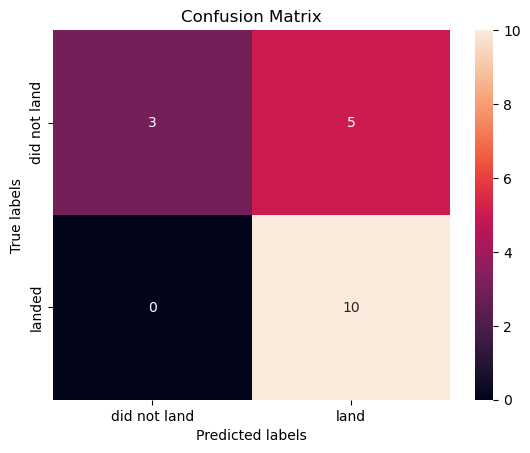

In [43]:
plot_confusion_matrix(y_test, y_test_predicted)

In [45]:
# y_test_predicted=logreg_cv.predict(X_norm_test)
# plot_confusion_matrix(y_test, y_test_predicted)

In [ ]:
# yhat=logreg_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [46]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma':np.logspace(-3, 3, 5)
}
svm = SVC()

In [47]:
svm_cv=GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_norm_train, y_train)
svm_best=svm_cv.best_estimator_

In [48]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8625


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [49]:
svm_best.score(X_norm_test, y_test)

0.7777777777777778

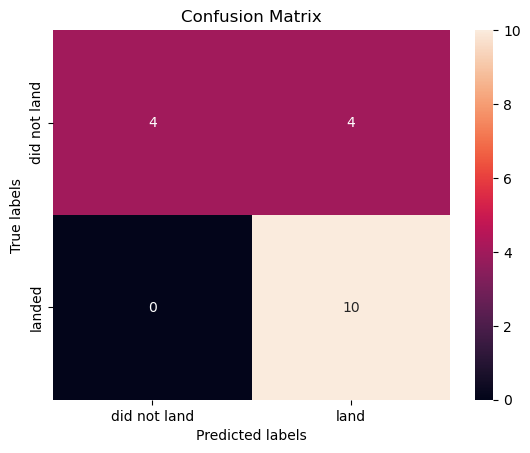

In [50]:
y_test_predicted=svm_best.predict(X_norm_test)
plot_confusion_matrix(y_test, y_test_predicted)

We can plot the confusion matrix


In [ ]:
# yhat=svm_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [51]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()

In [52]:
tree_cv=GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_norm_train, y_train)
tree_best=tree_cv.best_estimator_

/home/chuy/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/chuy/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/chuy/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/chuy/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_para

In [53]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.9160714285714286


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [54]:
tree_best.score(X_norm_test, y_test)

0.7222222222222222

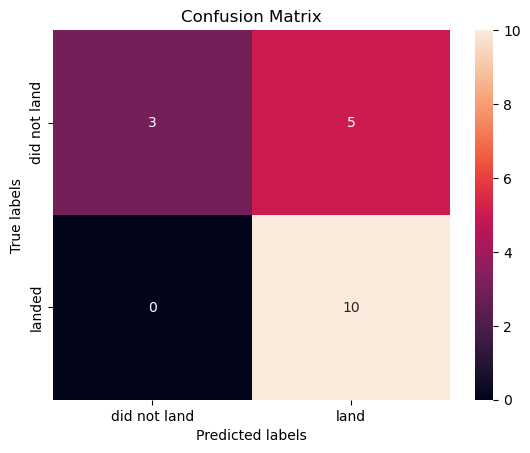

In [55]:
y_test_predicted=tree_best.predict(X_norm_test)
plot_confusion_matrix(y_test, y_test_predicted)

We can plot the confusion matrix


In [ ]:
# yhat = tree_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [56]:
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}
knn = KNeighborsClassifier()

In [57]:
knn_cv=GridSearchCV(estimator=knn, param_grid=parameters, cv=10)
knn_cv.fit(X_norm_train, y_train)
knn_best=knn_cv.best_estimator_

In [58]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
accuracy : 0.8767857142857143


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [59]:
knn_best.score(X_norm_test, y_test)

0.7777777777777778

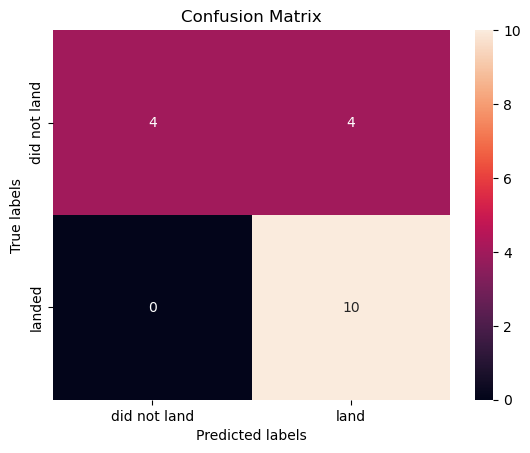

In [60]:
y_test_predicted=knn_best.predict(X_norm_test)
plot_confusion_matrix(y_test, y_test_predicted)

We can plot the confusion matrix


In [ ]:
# yhat = knn_cv.predict(X_test)
# plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [ ]:
# logreg_best
# svm_best
# tree_best
# knn_best

In [62]:
logreg_score_test=logreg_best.score(X_norm_test, y_test)
svm_score_test=svm_best.score(X_norm_test, y_test)
tree_score_test=tree_best.score(X_norm_test, y_test)
knn_score_test=knn_best.score(X_norm_test, y_test)

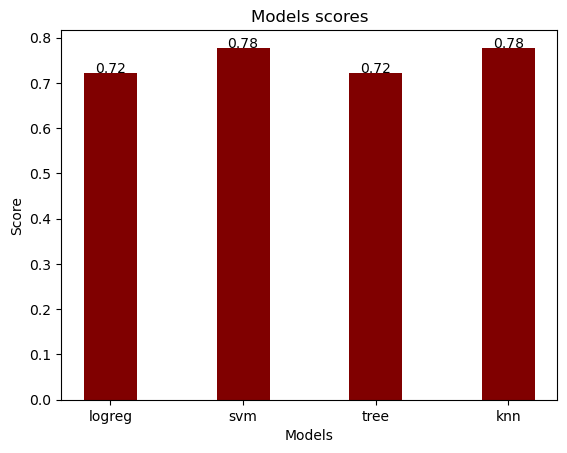

In [72]:
import matplotlib.pyplot as plt 

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x=i, y=y[i], s="{:.2f}".format(y[i]), ha = 'center')
        
x=['logreg', 'svm', 'tree', 'knn']
height=[logreg_score_test, svm_score_test, tree_score_test, knn_score_test]
plt.bar(
    x=x, 
    height=height, 
    color ='maroon', 
    width = 0.4
)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Models scores")
addlabels(x, height)
# plt.grid(True)
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
